In [1]:
# Libraries
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# seaborn features
sns.set()

# special functions
sys.path.insert(0, '../statistics')

# load functions
from functions import ecdf

In [2]:
# Data
df = pd.read_csv('michelson_speed_of_light.csv', header = 0, index_col = 0)
df.head()

,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,June 7,2,72,114.58,0.074,114.50,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles
3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070,P.M. Frame inclined at various angles
4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930,P.M. Frame inclined at various angles


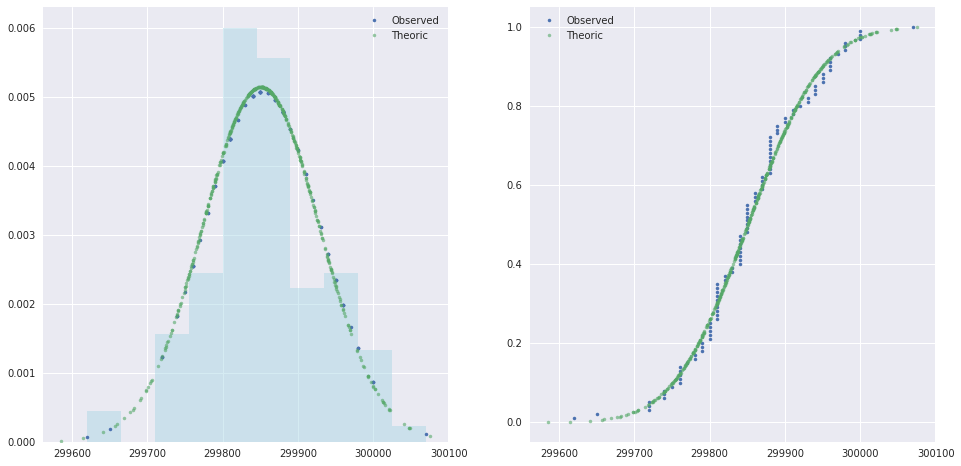

In [3]:
# checking normallity

# variables
speed = df.iloc[:,-2].values
speed_th = speed.mean() + speed.std() * np.random.randn(500)
speed_th = np.sort(speed_th)

# pdf observed
xp = np.sort(speed)
yp = ss.norm.pdf(x=xp, loc=speed.mean(), scale=speed.std())
yp_th = ss.norm.pdf(x=speed_th, loc=speed_th.mean(), scale=speed_th.std())

# cdf
xc, yc = ecdf(speed)
yc_th = ss.norm.cdf(x=speed_th, loc=speed_th.mean(), scale=speed_th.std())

# graphics
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(xp, yp, marker='.', linestyle='none', label='Observed')
plt.plot(speed_th, yp_th, marker= '.', linestyle='none', label="Theoric", alpha=0.6)
plt.hist(speed, alpha = 0.5, density=True, color='lightblue')
plt.legend()

plt.subplot(1,2,2)
plt.plot(xc, yc, marker= '.', linestyle='none', label="Observed")
plt.plot(speed_th, yc_th, marker= '.', linestyle='none', label="Theoric", alpha=0.6)
plt.legend()

plt.show()

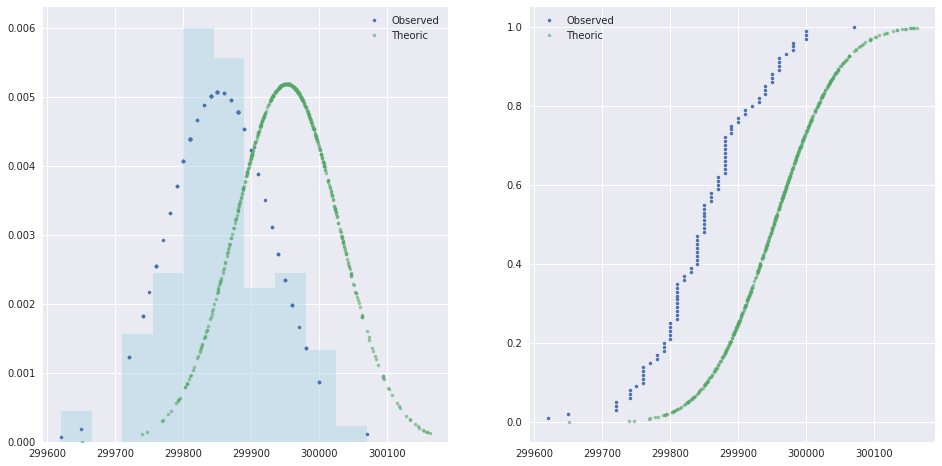

In [5]:
# checking normallity

# variables
speed = df.iloc[:,-2].values
speed_th = (speed.mean()+100) + speed.std() * np.random.randn(500)
speed_th = np.sort(speed_th)

# pdf observed
xp = np.sort(speed)
yp = ss.norm.pdf(x=xp, loc=speed.mean(), scale=speed.std())
yp_th = ss.norm.pdf(x=speed_th, loc=speed_th.mean(), scale=speed_th.std())

# cdf
xc, yc = ecdf(speed)
yc_th = ss.norm.cdf(x=speed_th, loc=speed_th.mean(), scale=speed_th.std())

# graphics
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(xp, yp, marker='.', linestyle='none', label='Observed')
plt.plot(speed_th, yp_th, marker= '.', linestyle='none', label="Theoric", alpha=0.6)
plt.hist(speed, alpha = 0.5, density=True, color='lightblue')
plt.legend()

plt.subplot(1,2,2)
plt.plot(xc, yc, marker= '.', linestyle='none', label="Observed")
plt.plot(speed_th, yc_th, marker= '.', linestyle='none', label="Theoric", alpha=0.6)
plt.legend()

plt.show()